# Coursework One - Q1 - House Price Prediction - Student


In this notebook we are doing the famous Kaggle Challenge where we try to predict the most accurately the price of houses in California in function of a set of features.

We follow these steps:

1. Load the file housing/train.csv. This is the only data you will use.
2. Visualise and analyse the data. 
3. Predict the SalesPrice column so study its distribution.
4. Examine which features are most correlated with the sales price.
5. Look for missing data and other issues.
6. Visualise the data and look for outliers to remove.
7. Drop any columns that do not seem helpful for predicting.
8. Split the data into a 33% test and 66% training set.
9. Use a linear regression model and compare its training and test performance.
10. Use Scipy to get the p-values and to see which features are important.
11. Repeat the fitting but use a Lasso and Ridge Regression. Discuss your results.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('housing/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# 1. Data Analysis

### Studying the Sale Price Distribution

(array([4.75580827e-07, 0.00000000e+00, 4.75580827e-07, 5.70696992e-07,
        5.70696992e-07, 6.65813158e-07, 3.04371729e-06, 2.75836880e-06,
        2.18767180e-06, 3.32906579e-06, 5.61185376e-06, 6.37278308e-06,
        6.94348007e-06, 8.75068721e-06, 8.46533872e-06, 8.65557105e-06,
        5.89720225e-06, 5.70696992e-06, 5.42162143e-06, 6.94348007e-06,
        6.37278308e-06, 5.13627293e-06, 4.28022744e-06, 3.13883346e-06,
        2.85348496e-06, 2.94860113e-06, 2.94860113e-06, 3.13883346e-06,
        2.47302030e-06, 2.18767180e-06, 1.61697481e-06, 1.80720714e-06,
        1.71209098e-06, 1.71209098e-06, 1.33162632e-06, 1.04627782e-06,
        4.75580827e-07, 7.60929323e-07, 1.23651015e-06, 1.14139398e-06,
        9.51161654e-07, 5.70696992e-07, 5.70696992e-07, 4.75580827e-07,
        9.51161654e-08, 2.85348496e-07, 4.75580827e-07, 5.70696992e-07,
        4.75580827e-07, 3.80464661e-07, 2.85348496e-07, 1.90232331e-07,
        2.85348496e-07, 9.51161654e-08, 2.85348496e-07, 9.511616

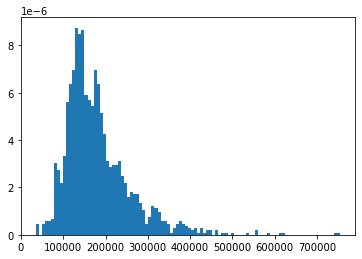

In [5]:
plt.hist(df.SalePrice, 100, density = 10)

In [45]:
np.std(df.SalePrice)

79247.41263162304

In [41]:
df['SalePrice'].mean()

180605.7664835165

### Looking for the relevant data

(0.0, 200000.0)

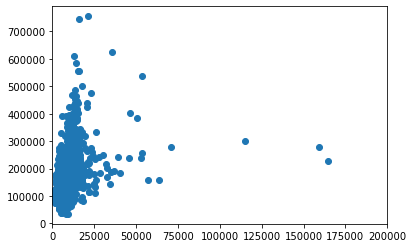

In [111]:
plt.scatter(df.LotArea, df.SalePrice)
plt.xlim(0,200000)
#Removing outliers

In [112]:
df.PoolArea.value_counts().sort_index()
# Looking for non significant data: only 7 pools

0      1453
480       1
512       1
519       1
555       1
576       1
648       1
738       1
Name: PoolArea, dtype: int64

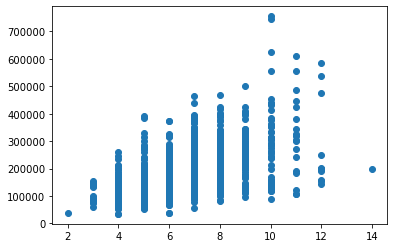

In [10]:
plt.scatter(df.TotRmsAbvGrd , df.SalePrice)
#Looking for significant data

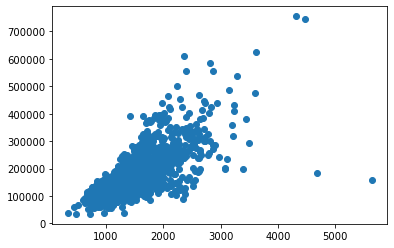

In [11]:
plt.scatter(df.GrLivArea , df.SalePrice)

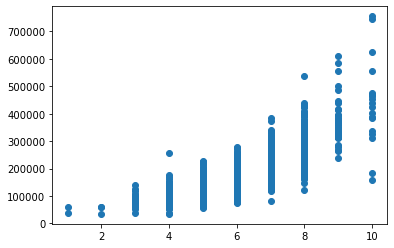

In [12]:
plt.scatter(df.OverallQual, df.SalePrice)

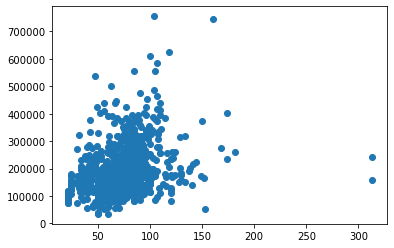

In [119]:
plt.scatter(df.LotFrontage, df.SalePrice)

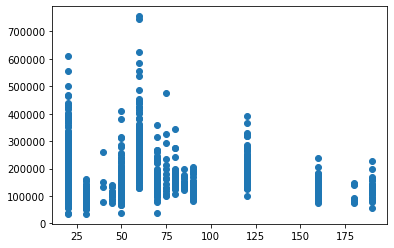

In [121]:
plt.scatter(df.MSSubClass, df.SalePrice)

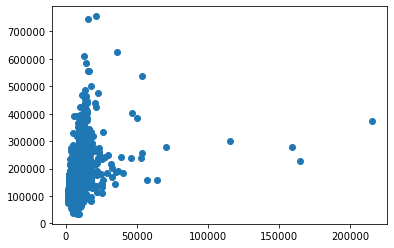

In [122]:
plt.scatter(df.LotArea, df.SalePrice)

# Data Preprocessing

In [50]:
df = df.loc[df["LotArea"] <= 100000]
#Removing non representative outliers

In [51]:
meanLF = df.LotFrontage.mean()
df['LotFrontage'] = df['LotFrontage'].fillna(meanLF)

In [52]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Encoding 

In [53]:
dummiesSaleType = pd.get_dummies(df.SaleType)

In [54]:
dummiesNeighborhood = pd.get_dummies(df.Neighborhood)
dummiesNeighborhood = dummiesNeighborhood.drop(['Veenker'], axis = 'columns') 
dummiesNeighborhood

,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,...,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1456,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1457,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
dummiesMSZoning = pd.get_dummies(df.MSZoning)
dummiesMSZoning = dummiesMSZoning.drop(['RM'], axis = 'columns')
dummiesMSZoning

,C (all),FV,RH,RL
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
1455,0,0,0,1
1456,0,0,0,1
1457,0,0,0,1
1458,0,0,0,1


In [56]:
dummiesGarageCars = pd.get_dummies(df.GarageCars)
dummiesGarageCars

,0,1,2,3,4
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
1455,0,0,1,0,0
1456,0,0,1,0,0
1457,0,1,0,0,0
1458,0,1,0,0,0


In [57]:
dummiesMSSubClass = pd.get_dummies(df.MSSubClass)
dummiesMSSubClass = dummiesMSSubClass.drop([190], axis = 'columns')
dummiesMSSubClass.columns = ['A', 'B', 'C', 'D', 'E', 'F','G','H','I','J','K','L','M','N']

# Final Dataframe

In [58]:
final = pd.concat([df.SalePrice, df.OverallCond,df.OverallQual, dummiesMSSubClass, dummiesMSZoning,df.LotArea , df.LotFrontage, dummiesNeighborhood, df.TotRmsAbvGrd, df.GrLivArea, dummiesGarageCars], axis = 'columns')
final = final.dropna()
final

,SalePrice,OverallCond,OverallQual,A,B,C,D,E,F,G,...,Somerst,StoneBr,Timber,TotRmsAbvGrd,GrLivArea,0,1,2,3,4
0,208500,5,7,0,0,0,0,0,1,0,...,0,0,0,8,1710,0,0,1,0,0
1,181500,8,6,1,0,0,0,0,0,0,...,0,0,0,6,1262,0,0,1,0,0
2,223500,5,7,0,0,0,0,0,1,0,...,0,0,0,6,1786,0,0,1,0,0
3,140000,5,7,0,0,0,0,0,0,1,...,0,0,0,7,1717,0,0,0,1,0
4,250000,5,8,0,0,0,0,0,1,0,...,0,0,0,9,2198,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,5,6,0,0,0,0,0,1,0,...,0,0,0,7,1647,0,0,1,0,0
1456,210000,6,6,1,0,0,0,0,0,0,...,0,0,0,7,2073,0,0,1,0,0
1457,266500,9,7,0,0,0,0,0,0,1,...,0,0,0,9,2340,0,1,0,0,0
1458,142125,6,5,1,0,0,0,0,0,0,...,0,0,0,5,1078,0,1,0,0,0


### Testing Model

In [59]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
X = final.drop('SalePrice', axis = 'columns')
y = final.SalePrice

In [60]:
reg.fit(X,y)

LinearRegression()

In [61]:
reg.score(X,y)

0.8381498070493847

### Train Test Split

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 11)
#ajouter random_state = 10

In [64]:
reg.fit(X_train, y_train)

LinearRegression()

In [65]:
y_pred = reg.predict(X_test)

In [66]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %15.3f" % mean_squared_error(y_test, y_pred))
print('R squared: %5.2f' % r2_score(y_test, y_pred))

Mean squared error:   832746541.538
R squared:  0.85


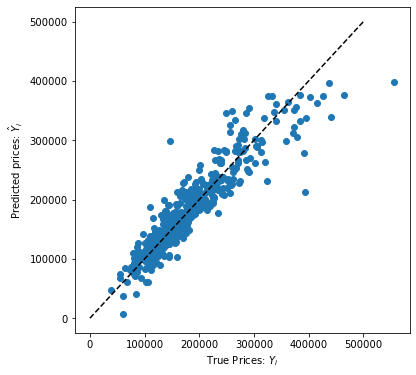

In [67]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("True Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.plot([0, 500000], [0, 500000], '--k');

# Regularisation 

In [68]:
from sklearn import linear_model

lasso_reg = linear_model.Lasso(alpha = 50, max_iter = 100, tol = 0.1)

lasso_reg.fit(X_train, y_train)
lasso_reg.score(X_test, y_test)

0.8360362799555708

In [69]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [70]:
ridge_reg.score(X_test, y_test)

0.8342845628326017

In [71]:
y_pred = lasso_reg.predict(X_test)
print("Mean squared error: %15.3f" % mean_squared_error(y_test, y_pred))
print('R squared: %5.2f' % r2_score(y_test, y_pred))

Mean squared error:   926675834.396
R squared:  0.84


In [72]:
y_pred = ridge_reg.predict(X_test)
print("Mean squared error: %15.3f" % mean_squared_error(y_test, y_pred))
print('R squared: %5.2f' % r2_score(y_test, y_pred))

Mean squared error:   936576036.258
R squared:  0.83


In [73]:
import statsmodels.api as sma

In [74]:
from sklearn.feature_selection import chi2 

scores, pvalues = chi2(X, y) 

pvalues 

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 9.98433929e-06,
       9.99715372e-01, 2.03397959e-01, 9.99497629e-01, 7.09458629e-02,
       9.33539129e-01, 1.68097781e-02, 1.00000000e+00, 9.99999983e-01,
       9.62737930e-01, 2.24438137e-01, 8.87339738e-01, 9.99286474e-01,
       6.00039600e-20, 1.19619848e-07, 9.99999892e-01, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.84878264e-09, 1.00000000e+00,
       8.46876328e-01, 9.35173869e-01, 1.00000000e+00, 8.70368446e-02,
       3.23626155e-03, 9.99503697e-01, 5.02897548e-01, 2.35811671e-02,
       2.44050677e-01, 9.99989125e-01, 9.99285513e-01, 9.99996066e-01,
       9.99999920e-01, 1.43393614e-21, 2.02766067e-23, 9.90981331e-01,
       1.00000000e+00, 1.00000000e+00, 5.10536996e-01, 4.73493285e-08,
       6.16649933e-08, 2.35666635e-04, 1.00000000e+00, 0.00000000e+00,
       1.46516947e-01, 9.36728689e-01, 1.00000000e+00, 9.44036140e-17,
       4.29934957e-03])

In [75]:
reg.coef_

array([ 7.06950032e+03,  1.53336000e+04,  2.30814225e+04,  1.23102296e+04,
        8.29318879e+03, -1.91596421e+03, -2.93746100e+03,  5.30035988e+03,
       -1.61689064e+04, -1.49712728e+04,  1.93599736e+04,  2.75792331e+04,
       -1.60218354e+03,  3.53294473e+03, -3.39579358e+04,  4.04660644e+03,
       -1.88376243e+04,  5.45801046e+03, -9.09002097e+03,  2.37184722e+03,
        5.69664585e-01, -2.00387465e+02, -1.64953694e+04, -6.95924376e+03,
       -6.62679659e+03, -2.33765887e+04,  1.48557821e+03, -8.06622132e+03,
       -3.18601165e+03, -3.27497461e+04, -1.02054796e+04, -3.04654938e+04,
       -1.16847278e+04, -2.22464115e+04, -2.54007045e+04, -8.66839018e+03,
       -2.65695416e+04,  4.45886235e+04,  4.42534949e+04, -4.34093242e+04,
       -3.83360242e+04, -2.83461468e+04, -8.95010479e+03,  1.09077863e+04,
        4.65723673e+04, -8.38163382e+03, -8.39976574e+02,  6.39005594e+01,
       -2.02592927e+04, -1.82422571e+04, -1.26126105e+04,  2.84873822e+04,
        2.26267781e+04])